# 0.0 - Imports Libraries

In [1]:
import warnings

import pandas as pd
import numpy  as np

import matplotlib.pyplot as plt

from sklearn import metrics as mt
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge

In [2]:
warnings.filterwarnings('ignore')

# 1.0 Load Dataset

In [3]:
# Train Dataset 
df_X_train = pd.read_csv( '../dataset/regressao/X_training.csv' )
df_y_train = pd.read_csv( '../dataset/regressao/y_training.csv' )

# Validation Dataset 
df_X_val = pd.read_csv( '../dataset/regressao/X_validation.csv' )
df_y_val = pd.read_csv( '../dataset/regressao/y_val.csv' )

# Validation Dataset 
df_X_test = pd.read_csv( '../dataset/regressao/X_test.csv' )
df_y_test = pd.read_csv( '../dataset/regressao/y_test.csv' )

# 2.0 - Algoritmo: Lasso

Parametros:
* max_iter
* alpha

## 2.1 - Performance for Train Dataset

In [4]:
# define
lasso = Lasso( random_state=77 )

# training
lasso.fit( df_X_train, df_y_train )

# predict
y_pred_train = lasso.predict( df_X_train )

# performance metrics
r2_train = mt.r2_score( df_y_train, y_pred_train )
mse_train = mt.mean_squared_error( df_y_train, y_pred_train )
rmse_train = mt.mean_squared_error( df_y_train, y_pred_train, squared=False )
mae_train = mt.mean_absolute_error( df_y_train, y_pred_train )
mape_train = mt.mean_absolute_percentage_error( df_y_train, y_pred_train )

print( f'Train R2: {r2_train:.5}' )
print( f'Train MSE: {mse_train:.5}' )
print( f'Train RMSE: {rmse_train:.5}' )
print( f'Train MAE: {mae_train:.5}' )
print( f'Train MSE {mape_train:.5}' )

Train R2: 0.0074009
Train MSE: 474.47
Train RMSE: 21.782
Train MAE: 17.305
Train MSE 8.7367


## 2.2 - Performance for Validation Dataset

In [5]:
# define
lasso_val = Lasso( random_state=77 )

# training
lasso_val.fit( df_X_train, df_y_train )

# predict
y_pred_val = lasso_val.predict( df_X_val )

# performance metrics
r2_val = mt.r2_score( df_y_val, y_pred_val )
mse_val = mt.mean_squared_error( df_y_val, y_pred_val )
rmse_val = mt.mean_squared_error( df_y_val, y_pred_val, squared=False )
mae_val = mt.mean_absolute_error( df_y_val, y_pred_val )
mape_val = mt.mean_absolute_percentage_error( df_y_val, y_pred_val )

print( f'Validation R2: {r2_val:.5}' )
print( f'Validation MSE: {mse_val:.5}' )
print( f'Validation RMSE: {rmse_val:.5}' )
print( f'Validation MAE: {mae_val:.5}' )
print( f'Validation MSE {mape_val:.5}' )

Validation R2: 0.0078836
Validation MSE: 473.75
Validation RMSE: 21.766
Validation MAE: 17.265
Validation MSE 8.6958


## 2.3 - Hyperparameter Fine Tuning

* Max Iter

In [6]:
max_iter = np.arange( 400, 4100, 100 )

r2_list_m = []
mse_list_m = []
rmse_list_m = []
mae_list_m = []
mape_list_m = []

In [7]:
for m in max_iter:
    # Definition
    lasso = Lasso(random_state=77, max_iter=m )
    lasso.fit( df_X_train, df_y_train )

    # Predict
    y_pred = lasso.predict( df_X_val )

    # Performance Metrics
    r2_m = mt.r2_score( df_y_val, y_pred )
    mse_m = mt.mean_squared_error( df_y_val, y_pred )
    rmse_m = mt.mean_squared_error( df_y_val, y_pred, squared=False )
    mae_m = mt.mean_absolute_error( df_y_val, y_pred )
    mape_m = mt.mean_absolute_percentage_error( df_y_val, y_pred )

    r2_list_m.append( r2_m )
    mse_list_m.append( mse_m )
    rmse_list_m.append( rmse_m )
    mae_list_m.append( mae_m )
    mape_list_m.append( mape_m )

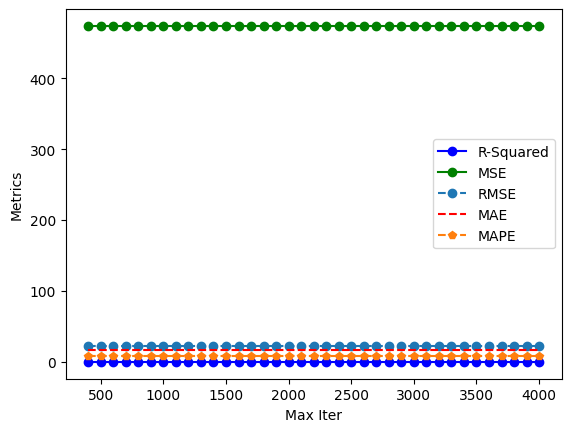

In [8]:
plt.plot( max_iter, r2_list_m, 'bo-', label='R-Squared')
plt.plot( max_iter, mse_list_m, 'go-', label='MSE')
plt.plot( max_iter, rmse_list_m, 'o--', label='RMSE')
plt.plot( max_iter, mae_list_m, 'r--', label='MAE')
plt.plot( max_iter, mape_list_m, 'p--', label='MAPE')
plt.xlabel( 'Max Iter' )
plt.ylabel( 'Metrics' )
plt.legend();

In [9]:
best_iter = max_iter[ np.argmin(rmse_list_m) ]
best_iter

400

* Alpha

In [10]:
alpha = np.arange( 0, 5, 0.2 )

r2_list = []
mse_list = []
rmse_list = []
mae_list = []
mape_list = []

In [11]:
for a in alpha:
    # Definition
    lasso = Lasso(random_state=77, max_iter=best_iter, alpha=a )
    lasso.fit( df_X_train, df_y_train )

    # Predict
    y_pred = lasso.predict( df_X_val )

    # Performance Metrics
    r2_a = mt.r2_score( df_y_val, y_pred )
    mse_a = mt.mean_squared_error( df_y_val, y_pred )
    rmse_a = mt.mean_squared_error( df_y_val, y_pred, squared=False )
    mae_a = mt.mean_absolute_error( df_y_val, y_pred )
    mape_a = mt.mean_absolute_percentage_error( df_y_val, y_pred )

    r2_list.append( r2_a )
    mse_list.append( mse_a )
    rmse_list.append( rmse_a )
    mae_list.append( mae_a )
    mape_list.append( mape_a )

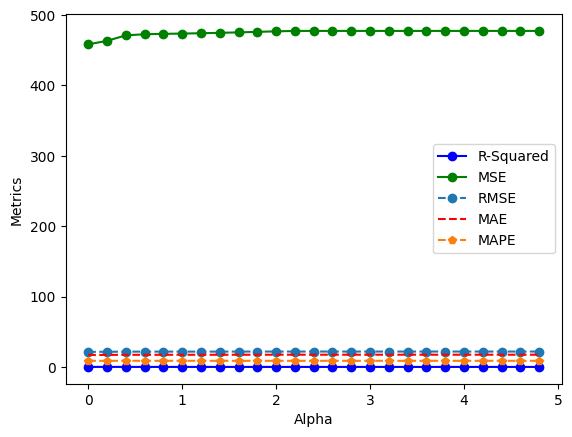

In [12]:
plt.plot( alpha, r2_list, 'bo-', label='R-Squared')
plt.plot( alpha, mse_list, 'go-', label='MSE')
plt.plot( alpha, rmse_list, 'o--', label='RMSE')
plt.plot( alpha, mae_list, 'r--', label='MAE')
plt.plot( alpha, mape_list, 'p--', label='MAPE')
plt.xlabel( 'Alpha' )
plt.ylabel( 'Metrics' )
plt.legend();

In [13]:
best_alpha = alpha[ np.argmin( rmse_list) ]
best_alpha

0.0

## 2.4 - Performance for Test Dataset

In [14]:
# define
lasso_test = Lasso( random_state=77, max_iter=best_iter, alpha=best_alpha )

# training
lasso_test.fit( np.concatenate((df_X_train, df_X_val)), np.concatenate((df_y_train, df_y_val ))  )

# predict
y_pred_test = lasso_test.predict( df_X_test )

# performance metrics
r2_test = mt.r2_score( df_y_test, y_pred_test )
mse_test = mt.mean_squared_error( df_y_test, y_pred_test )
rmse_test = mt.mean_squared_error( df_y_test, y_pred_test, squared=False )
mae_test = mt.mean_absolute_error( df_y_test, y_pred_test )
mape_test = mt.mean_absolute_percentage_error( df_y_test, y_pred_test )

print( f'Test R2: {r2_test:.5}' )
print( f'Test MSE: {mse_test:.5}' )
print( f'Test RMSE: {rmse_test:.5}' )
print( f'Test MAE: {mae_test:.5}' )
print( f'Test MSE {mape_test:.5}' )

Validation R2: 0.051166
Validation MSE: 461.99
Validation RMSE: 21.494
Validation MAE: 17.144
Validation MSE 8.5314


# 3.0 - Algoritmo: Ridge

Parametros:
* max_iter
* alpha

## 3.1 - Performance for Train Dataset

In [15]:
# Train Dataset - Copy
X_train_ridge = df_X_train.copy() 
y_train_ridge = df_y_train.copy()  

# Validation Dataset - Copy
X_val_ridge = df_X_val.copy()  
y_val_ridge = df_y_val.copy()  

# Validation Dataset - Copy
X_test_ridge = df_X_test.copy()  
y_test_ridge = df_y_test.copy()  

In [16]:
# Define
ridge = Ridge( random_state=77 )

# Training
ridge.fit( X_train_ridge, y_train_ridge )

# Predict
y_pred_train = ridge.predict( X_train_ridge )

# Performance Metrics
r2_train_ridge = mt.r2_score( y_train_ridge, y_pred_train )
mse_train_ridge = mt.mean_squared_error( y_train_ridge, y_pred_train )
rmse_train_ridge = mt.mean_squared_error( y_train_ridge, y_pred_train, squared=False )
mae_train_ridge = mt.mean_absolute_error( y_train_ridge, y_pred_train )
mape_train_ridge = mt.mean_absolute_percentage_error( y_train_ridge, y_pred_train )

print( f'Train Ridge R2: {r2_train_ridge:.5}' )
print( f'Train Ridge MSE: {mse_train_ridge:.5}' )
print( f'Train Ridge RMSE: {rmse_train_ridge:.5}' )
print( f'Train Ridge MAE: {mae_train_ridge:.5}' )
print( f'Train Ridge MAPE: {mape_train_ridge:.5}' )

Train Ridge R2: 0.046058
Train Ridge MSE: 456.0
Train Ridge RMSE: 21.354
Train Ridge MAE: 16.998
Train Ridge MAPE: 8.6534


## 3.2 - Performance for Validation Dataset

In [17]:
# Define
ridge_val = Ridge( random_state=77 )

# Training
ridge_val.fit( X_train_ridge, y_train_ridge )

# Predict
y_pred_val = ridge_val.predict( X_val_ridge )

# Performance Metrics
r2_val_ridge = mt.r2_score( y_val_ridge, y_pred_val )
mse_val_ridge = mt.mean_squared_error( y_val_ridge, y_pred_val )
rmse_val_ridge = mt.mean_squared_error( y_val_ridge, y_pred_val, squared=False )
mae_val_ridge = mt.mean_absolute_error( y_val_ridge, y_pred_val )
mape_val_ridge = mt.mean_absolute_percentage_error( y_val_ridge, y_pred_val )

print( f'Validation Ridge R2: {r2_val_ridge:.5}' )
print( f'Validation Ridge MSE: {mse_val_ridge:.5}' )
print( f'Validation Ridge RMSE: {rmse_val_ridge:.5}' )
print( f'Validation Ridge MAE: {mae_val_ridge:.5}' )
print( f'Validation Ridge MAPE: {mape_val_ridge:.5}' )

Validation Ridge R2: 0.039928
Validation Ridge MSE: 458.45
Validation Ridge RMSE: 21.411
Validation Ridge MAE: 17.039
Validation Ridge MAPE: 8.6824


## 3.3 - Hyperparameter Fine Tuning

Max Iter

In [18]:
max_iter_ridge = np.arange( 100, 5100, 100 )

r2_list_r = []
mse_list_r = []
rmse_list_r = []
mae_list_r = []
mape_list_r = []

In [20]:
for mr in max_iter_ridge:
    # Define
    ridge = Ridge( random_state=77, max_iter=mr )
    # Training
    ridge.fit( X_train_ridge, y_train_ridge )
    # Predict
    y_pred = ridge.predict( X_val_ridge )

    # Performance Metrics
    r2 = mt.r2_score( y_val_ridge, y_pred )
    mse = mt.mean_squared_error( y_val_ridge, y_pred )
    rmse = mt.mean_squared_error( y_val_ridge, y_pred, squared=False )
    mae = mt.mean_absolute_error( y_val_ridge, y_pred )
    mape = mt.mean_absolute_percentage_error( y_val_ridge, y_pred )

    r2_list_r.append( r2 )
    mse_list_r.append( mse )
    rmse_list_r.append( rmse )
    mae_list_r.append( mae )
    mape_list_r.append( mape )

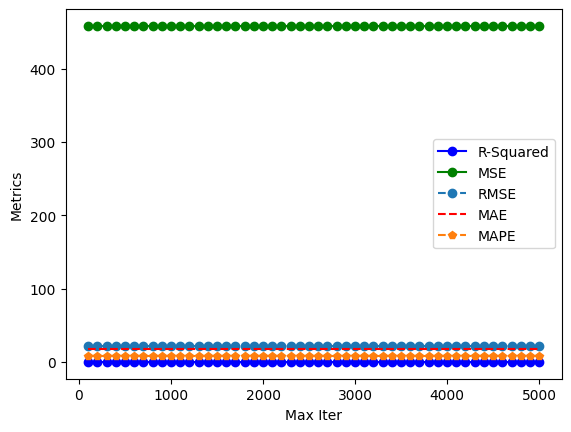

In [21]:
plt.plot( max_iter_ridge, r2_list_r, 'bo-', label='R-Squared')
plt.plot( max_iter_ridge, mse_list_r, 'go-', label='MSE')
plt.plot( max_iter_ridge, rmse_list_r, 'o--', label='RMSE')
plt.plot( max_iter_ridge, mae_list_r, 'r--', label='MAE')
plt.plot( max_iter_ridge, mape_list_r, 'p--', label='MAPE')
plt.xlabel( 'Max Iter' )
plt.ylabel( 'Metrics' )
plt.legend();

In [23]:
best_iter_r = max_iter_ridge[ np.argmin( rmse_list_r )]
best_iter_r

100

Alpha

In [32]:
alpha_r = np.arange( 0, 10, 0.2 )

r2_list_a = []
mse_list_a = []
rmse_list_a = []
mae_list_a = []
mape_list_a = []

In [33]:
for a in alpha_r:
    # Define
    ridge = Ridge( random_state=77, max_iter=best_iter_r, alpha=a )
    # Training
    ridge.fit( X_train_ridge, y_train_ridge )
    # Predict
    y_pred = ridge.predict( X_val_ridge )

    # Performance Metrics
    r2 = mt.r2_score( y_val_ridge, y_pred )
    mse = mt.mean_squared_error( y_val_ridge, y_pred )
    rmse = mt.mean_squared_error( y_val_ridge, y_pred, squared=False )
    mae = mt.mean_absolute_error( y_val_ridge, y_pred )
    mape = mt.mean_absolute_percentage_error( y_val_ridge, y_pred )

    r2_list_a.append( r2 )
    mse_list_a.append( mse )
    rmse_list_a.append( rmse )
    mae_list_a.append( mae )
    mape_list_a.append( mape )

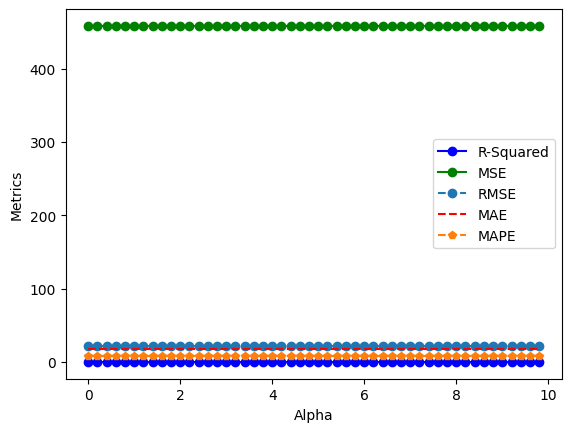

In [34]:
plt.plot( alpha_r, r2_list_a, 'bo-', label='R-Squared')
plt.plot( alpha_r, mse_list_a, 'go-', label='MSE')
plt.plot( alpha_r, rmse_list_a, 'o--', label='RMSE')
plt.plot( alpha_r, mae_list_a, 'r--', label='MAE')
plt.plot( alpha_r, mape_list_a, 'p--', label='MAPE')
plt.xlabel( 'Alpha' )
plt.ylabel( 'Metrics' )
plt.legend();

In [35]:
best_iter_a = alpha_r[ np.argmin( rmse_list_a )]
best_iter_a

8.0

## 3.4 - Performance for Test Dataset

In [36]:
# define
ridge_test = Ridge( random_state=77, max_iter=best_iter_r, alpha=best_iter_a )
# training
ridge_test.fit( np.concatenate(( X_train_ridge, X_val_ridge)), np.concatenate((y_train_ridge, y_val_ridge ))  )

# predict
y_pred_test = ridge_test.predict( X_test_ridge )

# performance metrics
r2_test = mt.r2_score( y_test_ridge, y_pred_test )
mse_test = mt.mean_squared_error( y_test_ridge, y_pred_test )
rmse_test = mt.mean_squared_error( y_test_ridge, y_pred_test, squared=False )
mae_test = mt.mean_absolute_error( y_test_ridge, y_pred_test )
mape_test = mt.mean_absolute_percentage_error( y_test_ridge, y_pred_test )

print( f'Test R2: {r2_test:.5}' )
print( f'Test MSE: {mse_test:.5}' )
print( f'Test RMSE: {rmse_test:.5}' )
print( f'Test MAE: {mae_test:.5}' )
print( f'Test MSE {mape_test:.5}' )

Test R2: 0.051144
Test MSE: 462.0
Test RMSE: 21.494
Test MAE: 17.143
Test MSE 8.5366
